In [25]:
import os
from matplotlib import pyplot as plt
from model import CVAE
import os
import torch
from dataset import ArolDataset
import pandas as pd
import seaborn as sns

In [26]:
min_std = pd.read_csv("../other_models/data/metadata/dataframe_interpolated_augmented_std.csv", header=None)
min_std = torch.tensor(min_std.transpose().iloc[1].values.astype(float))
model = CVAE(seq_len=1, feat_dim=13, enc_out_dim=10, latent_dim=8, cond_dim=2, beta=0.5, learning_rate=0.01, min_std=0.25*min_std)
""" if os.path.exists("checkpoints/conditional_CVAE"):
    model.load_model("checkpoints/conditional_CVAE")
else:
    raise Exception("Checkpoint doesn't exists!") """

if os.path.exists("checkpoints/CVAE_final_likelihood"):
    model.load_model("checkpoints/CVAE_final_likelihood")
else:
    raise Exception("Checkpoint doesn't exists!")

model.eval()

dataset = ArolDataset("../data/linear_interpolated_union.csv")
        
cond = torch.tensor([10, 25_000], dtype=torch.float32)
cond = cond.reshape((1, cond.shape[0]))

start = dataset.__getitem__(0)[0]

""" cond = start[-2:]
cond = cond.reshape((1, cond.shape[0])) """

start = start[:-2]
start = start.reshape((1, start.shape[0]))
start = torch.cat([start, cond], dim=1)

def gen(start, num_to_generate):
    with torch.no_grad():        
        df_01 = pd.DataFrame(columns=dataset.columns_name)
        for i in range(num_to_generate):
            z, mu, std, y_hat, y_hat_mean, y_hat_log_scale = model(start)
            start = y_hat

            #cond = start[:,-2:]

            start = start[:,:-2]
            start = torch.cat([start, cond], dim=1)

            df_01 = pd.concat([df_01, pd.DataFrame(y_hat, index=[i], columns=dataset.columns_name)])

    return df_01

def plot_correlations(df, title):
    corr_matrix = df.corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=False, cmap='Purples', fmt=".2f")
    plt.title(title)
    plt.show()


Exception: Checkpoint doesn't exists!

/var/folders/x6/98brd2hd1692s39n12smyk2r0000gn/T/ipykernel_1043/3776775521.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_01 = pd.concat([df_01, pd.DataFrame(y_hat, index=[i], columns=dataset.columns_name)])


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

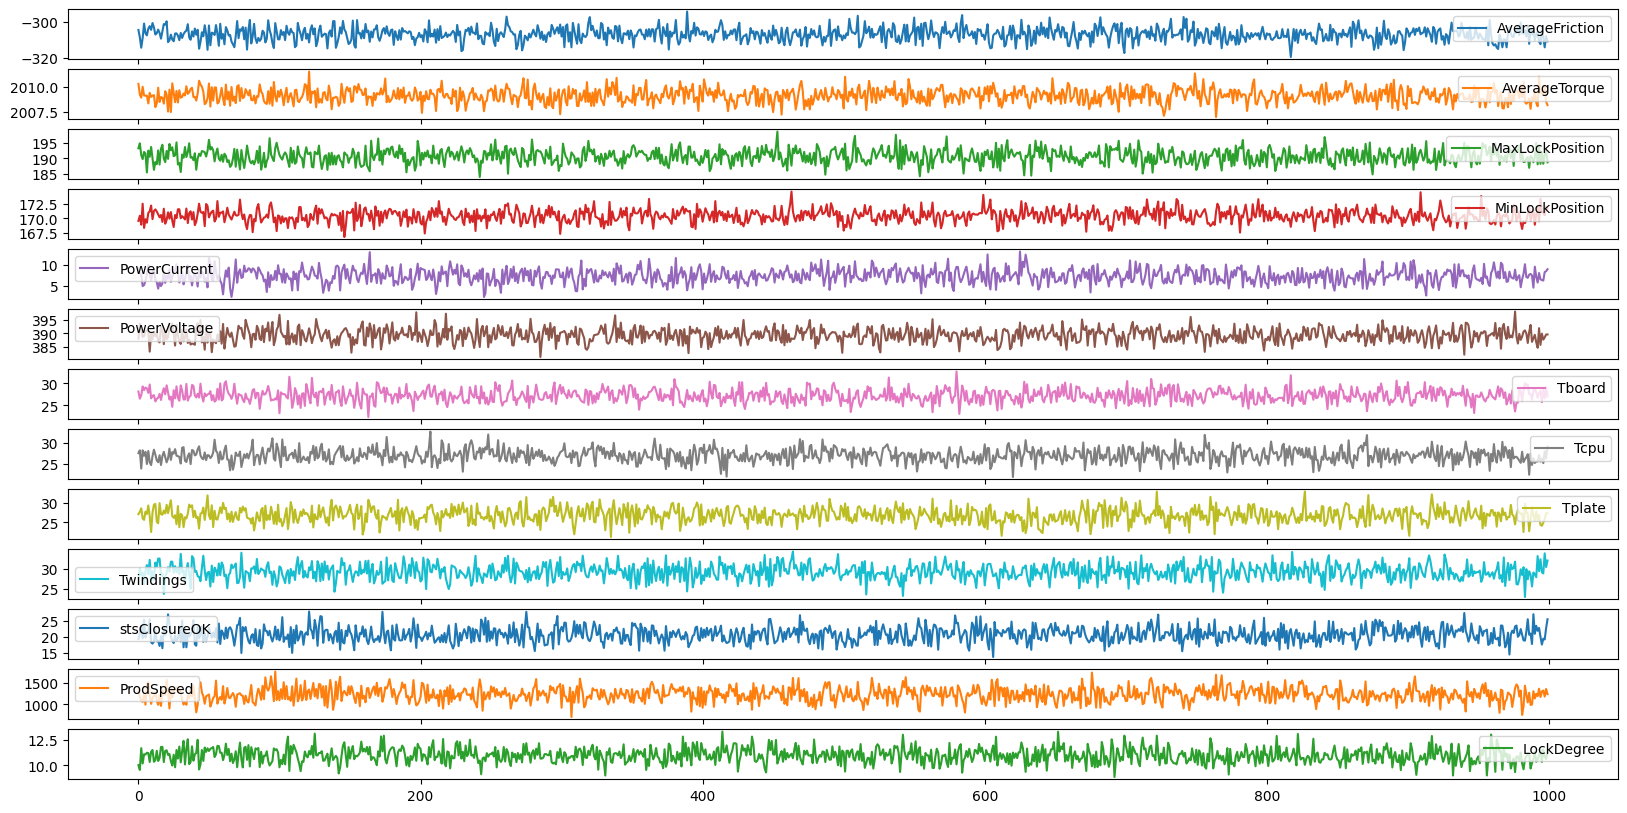

In [16]:
gen_df = gen(start, 1000)
gen_df.plot(subplots=True, figsize=(20,10))

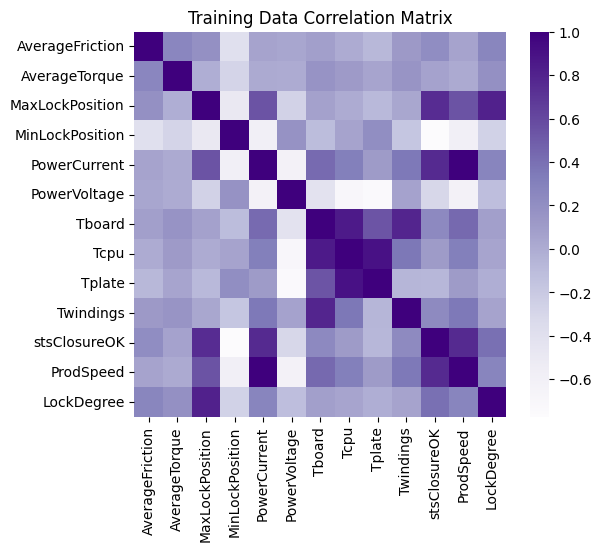

In [14]:
train_df = pd.read_csv("../data/linear_interpolated_union.csv", index_col=0).drop(columns="sensor_time")
columns_to_move = ['ProdSpeed', 'LockDegree']
remaining_columns = [col for col in train_df.columns if col not in columns_to_move]
train_df = train_df[remaining_columns + columns_to_move]
plot_correlations(train_df, "Training Data Correlation Matrix")

/var/folders/x6/98brd2hd1692s39n12smyk2r0000gn/T/ipykernel_43719/2463702191.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_01 = pd.concat([df_01, pd.DataFrame(y_hat, index=[i], columns=dataset.columns_name)])


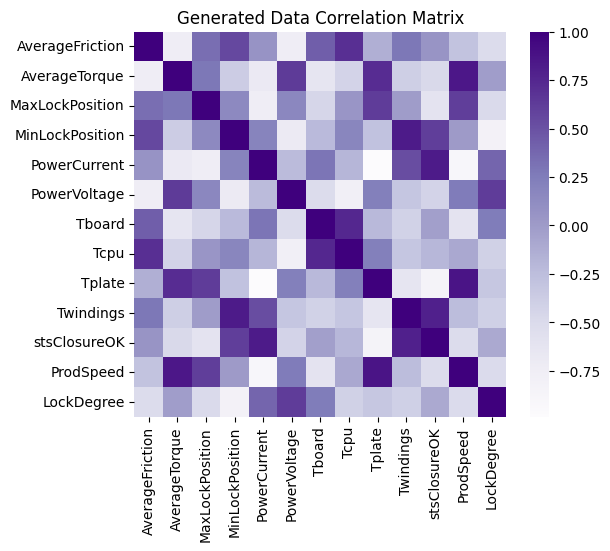

In [15]:
plot_correlations(gen(start, 5), "Generated Data Correlation Matrix (5 forecasting)")

/var/folders/x6/98brd2hd1692s39n12smyk2r0000gn/T/ipykernel_43719/2463702191.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_01 = pd.concat([df_01, pd.DataFrame(y_hat, index=[i], columns=dataset.columns_name)])


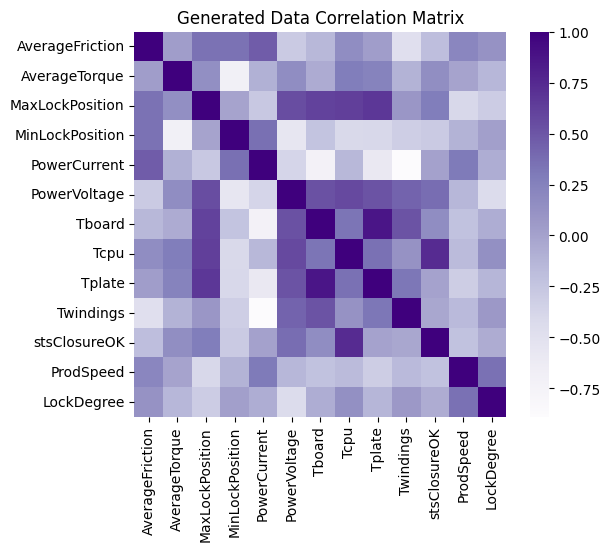

In [16]:
plot_correlations(gen(start, 10), "Generated Data Correlation Matrix (10 forecasting)")

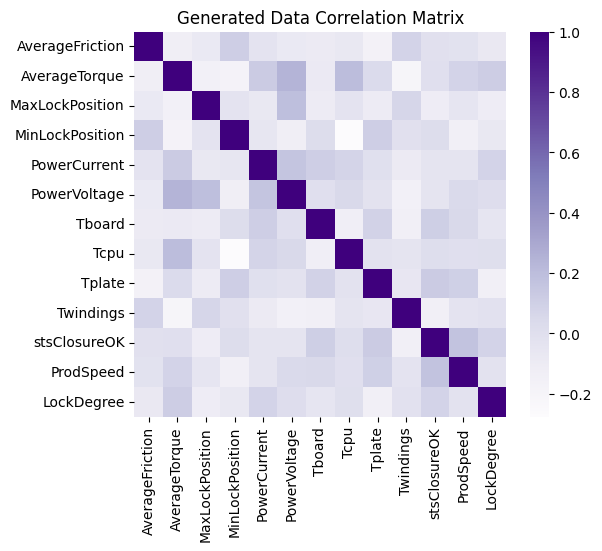

In [17]:
plot_correlations(gen_df, "Generated Data Correlation Matrix (120 forecasting)")